<a href="https://www.kaggle.com/muhramasaputra/okcupid-date-a-scientist?scriptVersionId=86439370" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/profiles-dating-app/profiles.csv


In [2]:
df = pd.read_csv('/kaggle/input/profiles-dating-app/profiles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

# Explore the data

Yang pertama kita harus explore adalah kolom sign, dari hasil print dibawah kita bisa lihat ada 48 macam horoscope, tapi sebenarnya hanya ada 12 saja. Selain itu kita akan drop row yang memiliki nan value di kolom sign.

In [3]:
print(df['sign'].value_counts())

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

Bersihkan sign column, dengan mengambil kata pertamanya saja, karena hanya ada 12 horoscope. 

# Continous Variable

Kita akan melihat distribusi dari continous variable menggunakan grafik, di dataset ini ada 3 continous variable :

1. Age
2. Height
3. Income

#### Age
Plot dibawah menunjukkan distribusi dari kolom age, terlihat bahwa sebagian besar umur dari pengguna OKCupid berada pada rentang 20 - 35 tahun. Garis merah dibawah menunjukkan rata-rata umur dari pengguna adalah 32 tahun.

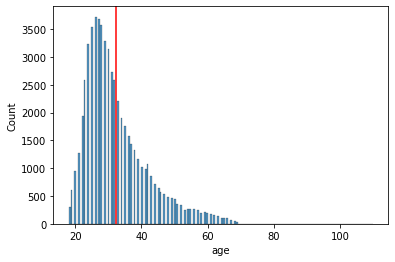

In [4]:
sns.histplot(data=df, x='age', stat='count')
plt.axvline(x=df.age.mean(), color='red')

Dibawah menggunakan chart yang sama, tapi dengan pembagian sesuai gender, bisa dilihat kedua gender memiliki proporsi yang sama dari umur, tapi overall perempuan lebih sedikit.

<AxesSubplot:xlabel='age', ylabel='Count'>

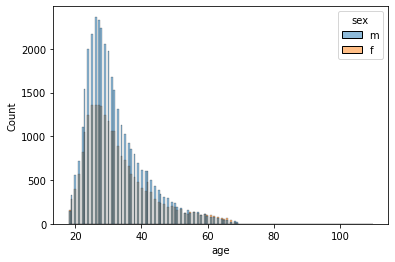

In [5]:
sns.histplot(data=df, x='age', stat='count', hue='sex')

#### Height
Dibawah adalah distribusi dari kolom height sesuai dengan jenis kelamin, terlihat jelas bahwa perempuan terlihat lebih pendek dari pada laki-laki.

<AxesSubplot:xlabel='height', ylabel='Count'>

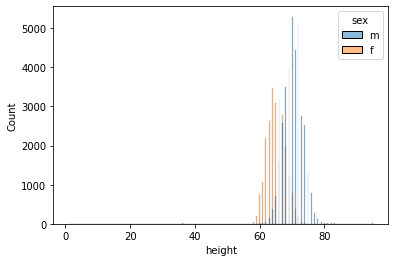

In [6]:
sns.histplot(data=df, x='height', hue='sex')

#### Income

Sesuai dengan grafik dibawah, bisa kita lihat bahwa sebagian besar dari pengguna tidak memasukkan income mereka.

<AxesSubplot:xlabel='income', ylabel='Count'>

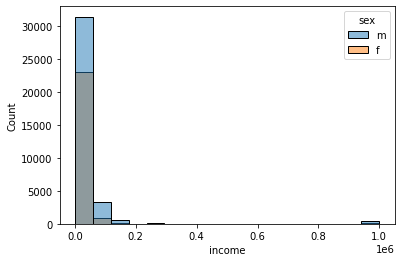

In [7]:
sns.histplot(data=df, x='income', hue='sex')

## Discrete Variables

#### Sex
Pengguna OKCupid kebanyakan adalah laki-laki dengan jumlah ~36000, sedangkan perempuan ~23000

<AxesSubplot:xlabel='count', ylabel='sex'>

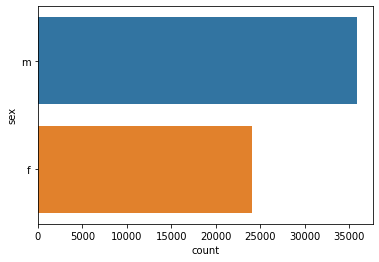

In [8]:
sns.countplot(data=df, y='sex')

#### Body Type
Grafik Body type kolom dibawah menunjukkan, kebanyakan pengguna mendeskripsikan dirinya sebagai average, athletic atau fit.

<AxesSubplot:xlabel='count', ylabel='body_type'>

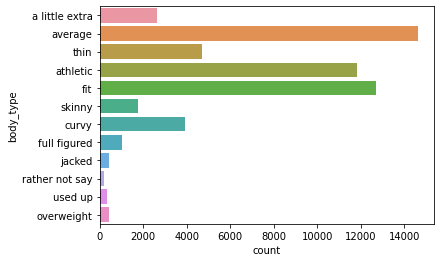

In [9]:
sns.countplot(data=df, y='body_type')

Grafik dibawah menunjukkan Body Type kolom berdasarkan jenis kelamin. Terlihat jelas bahwa kebanyakan yang menrepresentasikan dirinya athletic adalah laki-laki dan yang menrepresentasikan dirinya curvy adalah kebanyakan perempuan.

<AxesSubplot:xlabel='count', ylabel='body_type'>

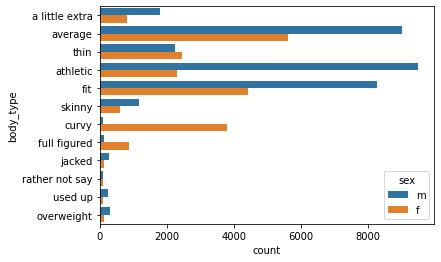

In [10]:
sns.countplot(data=df, y='body_type', hue='sex')

#### Diet

Dari grafik dibawah bisa dilihat bahwa diet type dari pengguna OKCupid adalah memakan semua jenis makanan, tapi itu dibagi tiga, yaitu strictly anything, mostly anything dan anything. Menjadi Open-Minded adalah signal yang populer untuk mendapatkan pasangan.

<AxesSubplot:xlabel='count', ylabel='diet'>

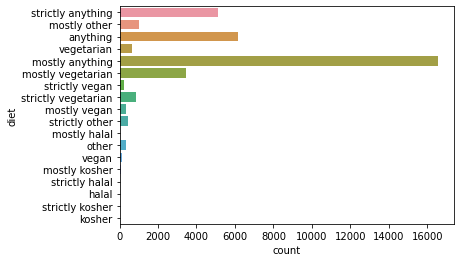

In [11]:
sns.countplot(data=df, y='diet')

#### Drinks
Dari grafik dibawah terlihat sebagian besar pengguna OKCupid mengkonsumsi alkohol secara socially

<AxesSubplot:xlabel='count', ylabel='drinks'>

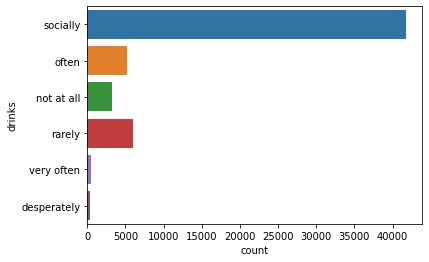

In [12]:
sns.countplot(data=df, y='drinks')

#### Drugs
Sebagian besar dari pengguna OKCupid tidak pernah mengkonsumsi narkoba, tapi ada ~8000 pengguna yang kadang mengkonsumsi itu dan ada juga beberapa yang sering mengkonsumsi narkoba.

<AxesSubplot:xlabel='count', ylabel='drugs'>

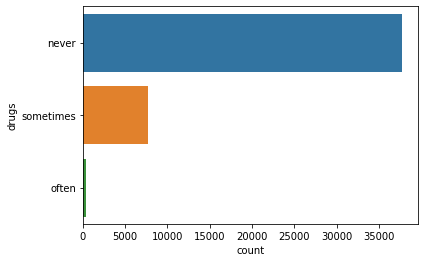

In [13]:
sns.countplot(data=df, y='drugs')

#### Education
Kebanyakan pengguna OKCupid lulus dari universitas dan ada sekitar ~9000 pengguna yang telah menyelesaikan master programnya.

<AxesSubplot:xlabel='count', ylabel='education'>

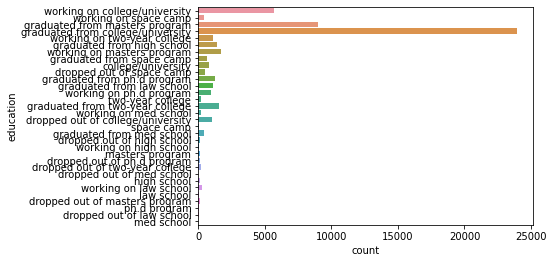

In [14]:
sns.countplot(data=df, y='education')

#### Ethnicity

In [15]:
print(df['ethnicity'].value_counts())

white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: ethnicity, Length: 217, dtype: int64


#### Job
Dari grafik dibawah terlihat bahwa ada ~5500 siswa yang memilik akun OKCupid dan ada 250 pengguna yang sudah pensiun.

<AxesSubplot:xlabel='count', ylabel='job'>

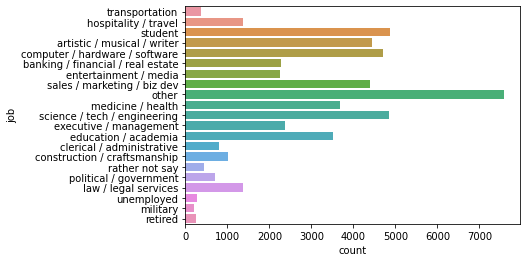

In [16]:
sns.countplot(data=df, y='job')

#### Offspring
Grafik menunjukkan bahwa sebagian besar pengguna tidak memiliki anak.

<AxesSubplot:xlabel='count', ylabel='offspring'>

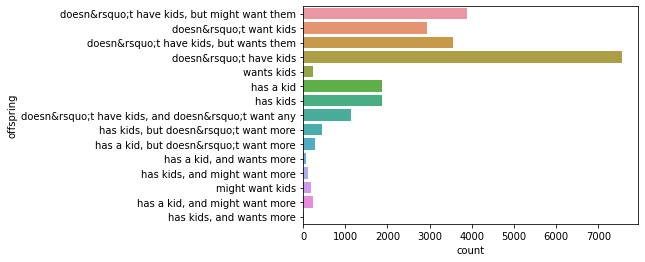

In [17]:
sns.countplot(data=df, y='offspring')

#### Orientation
Dari garfik dibawah terlihat ada 2767 pengguna yang memiliki orientasi bisexual dan ada 5573 pengguna yang gay.


<AxesSubplot:xlabel='count', ylabel='orientation'>

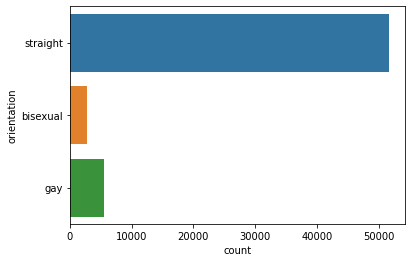

In [18]:
sns.countplot(data=df, y='orientation')

terlihat bahwa kebanyakan bisexual adalah perempuan.

<AxesSubplot:xlabel='count', ylabel='orientation'>

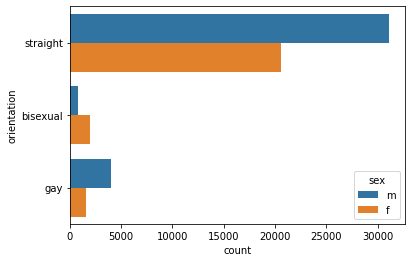

In [19]:
sns.countplot(data=df, y='orientation', hue='sex')

#### Pets
Dari grafik dibawah terlihat sebagian besar pengguna menyukai anjing dan kucing.

<AxesSubplot:xlabel='count', ylabel='pets'>

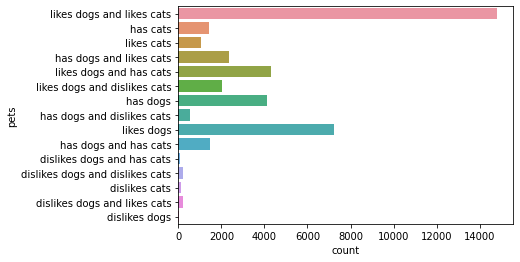

In [20]:
sns.countplot(data=df, y='pets')

#### Religion
Sebagian besar pengguna OKCupid memiliki keyakinan Agnosticism, lalu diurutan kedua memiliki keyakinan Atheism.

<AxesSubplot:xlabel='count', ylabel='newReligion'>

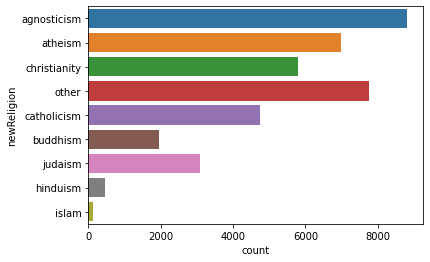

In [21]:
df['newReligion'] = df['religion'].str.split().str.get(0)
sns.countplot(data=df, y='newReligion')

#### Smokes
Sebagian besar pengguna tidak merokok dan ada sekitar 10,538 pengguna yang merokok.

<AxesSubplot:xlabel='count', ylabel='smokes'>

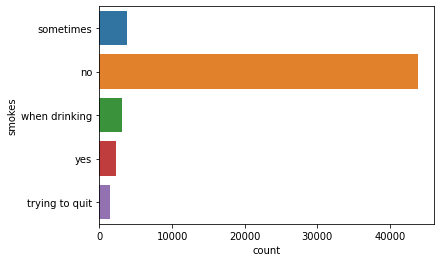

In [22]:
sns.countplot(data=df, y='smokes')

#### Sign

In [23]:
df['newSign'] = df['sign'].str.split().str.get(0)

Distribusi data dari tanda horoscope terlihat tidak terlalu extreme perbedaanya, dengan leo yang paling terbanyak dan capricorn yang paling sedikit.

<AxesSubplot:xlabel='count', ylabel='newSign'>

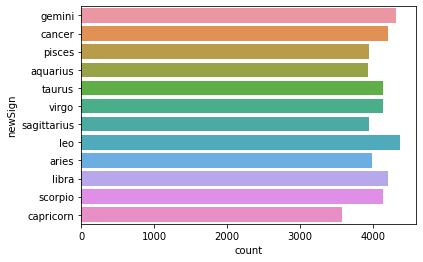

In [24]:
sns.countplot(data=df, y='newSign')

#### Status
Sudah kita bisa ketahui bersama bahwa semua pengguna OKCupid pastinya single.

<AxesSubplot:xlabel='count', ylabel='status'>

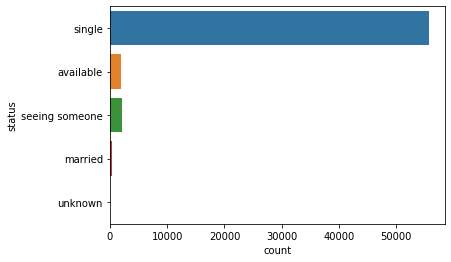

In [25]:
sns.countplot(data=df, y='status')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

## Data Preperation

#### Missing Data

Missing data tidak bisa di handle oleh Machine Learning, makanya sebelum kita memproses data kita harus mempersiapkannya terlebih dahulu,salah satu langkahnya adalah menangani Missing Data.

In [27]:
print(df.isnull().sum())

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
newReligion    20226
newSign        11056
dtype: int64


#### Preprocessing

Memproses data sangat penting untuk modeling machine learning, agar model kita bisa berjalan lebih cepat dan menghasilkan prediksi yang baik.

Jadi kita akan hanya memilih beberapa feature yang mungkin bagus untuk menjadi predictor untuk tanda horoskop.

In [28]:
ft = ['body_type', 'diet', 'job', 'offspring', 'orientation', 'sex', 'newReligion', 'newSign']
df = df[ft].dropna()
df.shape

(11491, 8)

#### Dummy Variable

Dummy Variable dibuat untuk menghandle categorical variable, jadi dummy variable akan mengubah kategori per variable ke binary identifier-nya sendiri. 

In [29]:
for col in ft[:-1]:
    df = pd.get_dummies(df, columns = [col], prefix = [col])

In [30]:
df.head()

,newSign,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,sex_m,newReligion_agnosticism,newReligion_atheism,newReligion_buddhism,newReligion_catholicism,newReligion_christianity,newReligion_hinduism,newReligion_islam,newReligion_judaism,newReligion_other
0,gemini,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,cancer,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,taurus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Label Imbalance
Ketidakseimbangan prediksi label harus dicek. Ini penting sejak masalah multi-class dimana 2 atau lebih outcomes bisa dimiliki. Ketidakseimbangan itu nggak bagus karena itu berarti ada label yang hanya terjadi beberapa kali. Dan ini bisa menjadi masalah untuk algoritma machine learning jika data tidak cukup untuk dilatih dan akan menghasilkan prediksi yang jelek.

Tapi untungnya jumlah data dari semua sodiak tidak terlalu jauh perbedaannya. Karenanya kita tidak perlu terlalu khawatir tentang masalah imbalance ini.

In [31]:
df.newSign.value_counts()

gemini         1098
leo            1038
cancer         1035
virgo           983
libra           972
scorpio         964
sagittarius     931
pisces          931
taurus          930
aries           922
aquarius        851
capricorn       836
Name: newSign, dtype: int64

#### Splitting Data
Selanjutnya data harus dipisah menjadi train dan validation set. Disini kita menggunakan 30% data untuk validation dan 70% sisanya digunakan untuk train set.

In [32]:
col_len = len(df.columns)

# X adalah train dan Y adalah validasi
X = df.iloc[:, 1:col_len]
Y = df.iloc[:, 0:1]

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#turn into 1d array
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

## Prediction

#### Model Building

Sekarang saatnya kita membuat model. Untuk projekt ini digunakan tiga algoritma untuk membuat model, yaitu Logistic Regression, Decision Tree dan KNN.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Logistic Regression

Model pertama adalah menggunakan Logistic Reression dengan multinomial class.

In [34]:
lr_model = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
lr_predict = lr_model.predict(X_train)

Final akurasi dari Logistic Regression adalah 13% yang mana itu termasuk buruk.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predict))

              precision    recall  f1-score   support

    aquarius       0.13      0.04      0.06       584
       aries       0.16      0.09      0.11       651
      cancer       0.13      0.19      0.15       738
   capricorn       0.15      0.07      0.10       581
      gemini       0.14      0.31      0.19       760
         leo       0.13      0.18      0.15       732
       libra       0.12      0.13      0.13       677
      pisces       0.12      0.06      0.08       635
 sagittarius       0.10      0.08      0.09       666
     scorpio       0.11      0.10      0.10       679
      taurus       0.14      0.10      0.12       663
       virgo       0.12      0.14      0.13       677

    accuracy                           0.13      8043
   macro avg       0.13      0.12      0.12      8043
weighted avg       0.13      0.13      0.12      8043



#### Decision Tree

In [36]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_predict = dt_model.predict(X_train)

Final akurasi dari Decision Tree adalah 85%. Itu adalah hasil yang sangat bagus untuk sebuah model machine learning, dan ini sangat jauh berbeda dengan akurasi dari Logistic Regression.

In [37]:
print(classification_report(Y_train, dt_predict))

              precision    recall  f1-score   support

    aquarius       0.69      0.97      0.80       584
       aries       0.74      0.91      0.82       651
      cancer       0.77      0.92      0.83       738
   capricorn       0.80      0.91      0.85       581
      gemini       0.81      0.86      0.83       760
         leo       0.84      0.83      0.84       732
       libra       0.88      0.82      0.85       677
      pisces       0.91      0.77      0.83       635
 sagittarius       0.92      0.76      0.83       666
     scorpio       0.95      0.78      0.85       679
      taurus       0.94      0.77      0.85       663
       virgo       0.95      0.73      0.83       677

    accuracy                           0.83      8043
   macro avg       0.85      0.84      0.84      8043
weighted avg       0.85      0.83      0.84      8043



#### K-Nearest Neighbors

In [38]:
knn_model = KNeighborsClassifier(n_neighbors = 12)
knn_model.fit(X_train, Y_train)
knn_predict = knn_model.predict(X_train)

Final akurasi dari KNN adalah 85% yang mana itu sama dengan hasil akurasi dari Decision Tree.

In [39]:
print(classification_report(Y_train, dt_predict))

              precision    recall  f1-score   support

    aquarius       0.69      0.97      0.80       584
       aries       0.74      0.91      0.82       651
      cancer       0.77      0.92      0.83       738
   capricorn       0.80      0.91      0.85       581
      gemini       0.81      0.86      0.83       760
         leo       0.84      0.83      0.84       732
       libra       0.88      0.82      0.85       677
      pisces       0.91      0.77      0.83       635
 sagittarius       0.92      0.76      0.83       666
     scorpio       0.95      0.78      0.85       679
      taurus       0.94      0.77      0.85       663
       virgo       0.95      0.73      0.83       677

    accuracy                           0.83      8043
   macro avg       0.85      0.84      0.84      8043
weighted avg       0.85      0.83      0.84      8043

